# Artificial Neural Network for Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import (
    CSVLogger,
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
    TensorBoard,
)
from keras.layers import Dense, Input, ReLU, Softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
data, target = load_iris(return_X_y=True, as_frame=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [4]:
model = Sequential(
    layers=[
        Input(shape=(4,)),
        Dense(128),
        ReLU(),
        Dense(64),
        ReLU(),
        Dense(32),
        ReLU(),
        Dense(3),
        Softmax(),
    ],
    name="ann",
)

In [5]:
model.summary()

Model: "ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,075 (43.26 KB)

 Trainable params: 11,075 (43.26 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=[SparseCategoricalAccuracy()])  # type: ignore

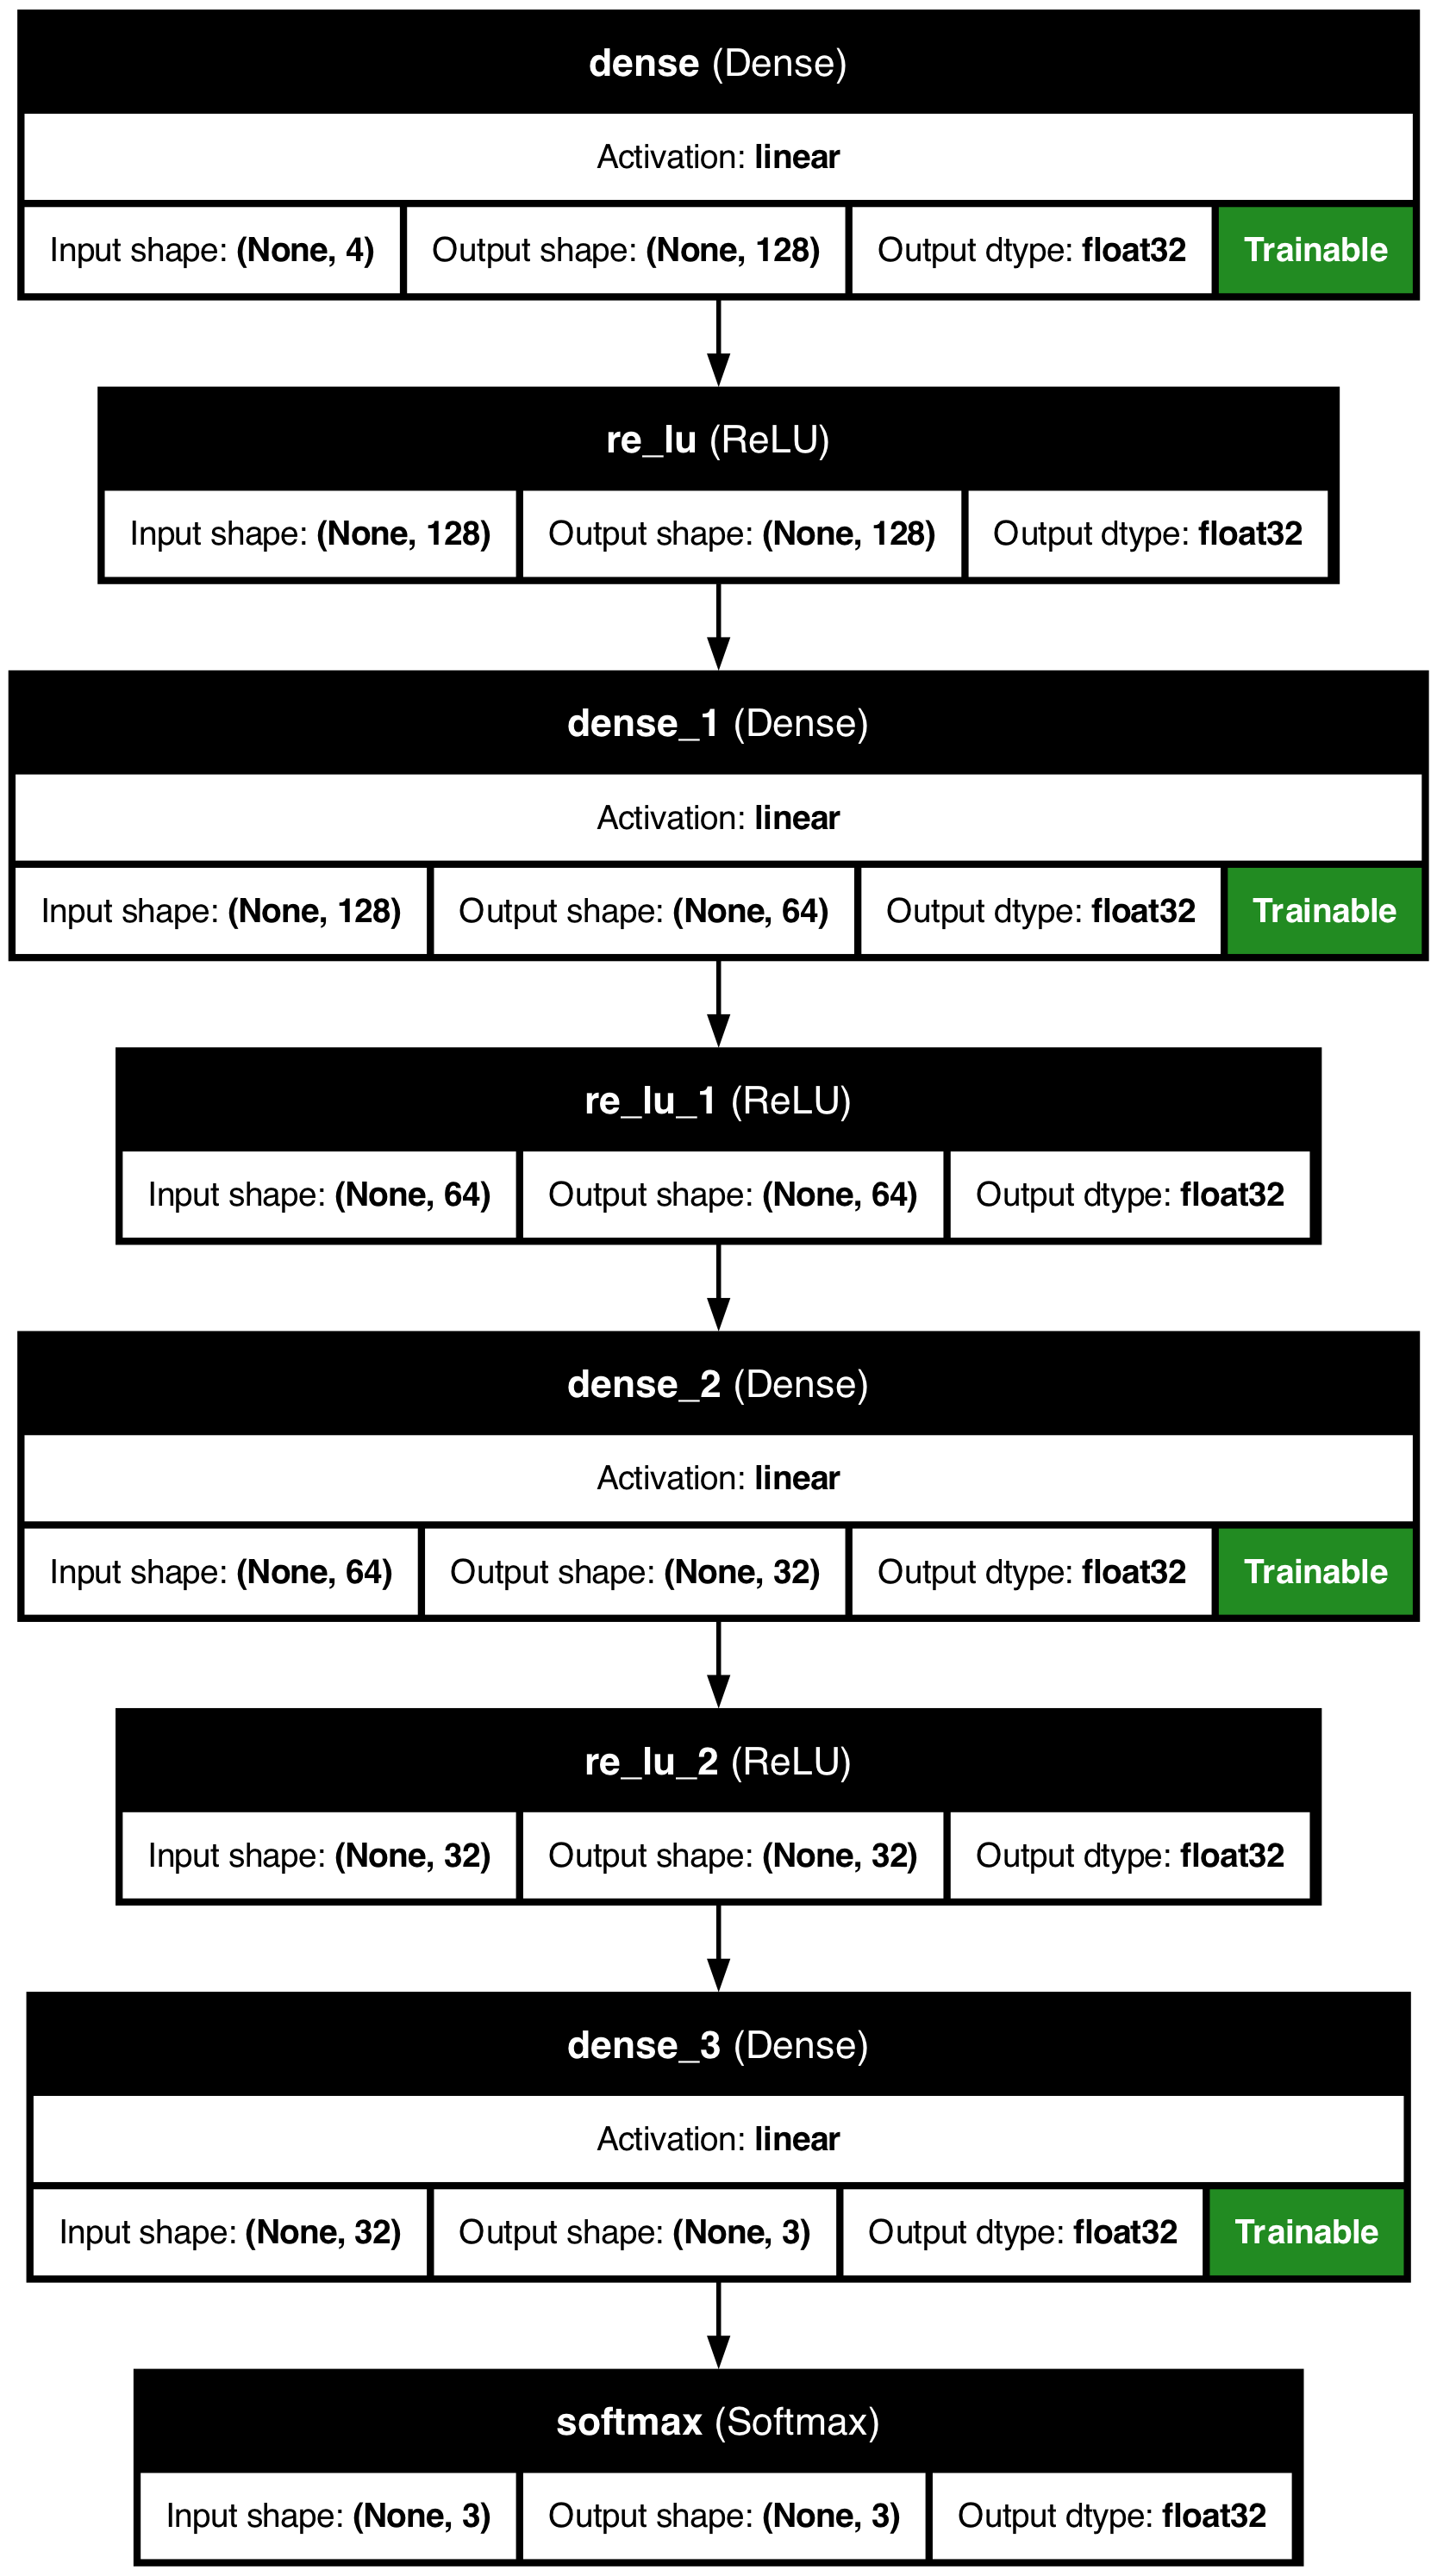

In [7]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [8]:
early_stopping_callback = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)
model_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/ann_classification.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
tensorboard_callback = TensorBoard(
    log_dir="../Logs/ann_classification_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/ann_classification_logs"

csvlogger_callback = CSVLogger("../Logs/ann_classification_logs.csv")

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)

In [9]:
ann_history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[
        early_stopping_callback,
        model_checkpoint_callback,
        tensorboard_callback,
        csvlogger_callback,
        reduce_lr_callback,
    ],
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.9226 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.9086 - val_sparse_categorical_accuracy: 0.6250 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.8162 - sparse_categorical_accuracy: 0.6875 - val_loss: 0.7600 - val_sparse_categorical_accuracy: 0.6250 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7291 - sparse_categorical_accuracy: 0.6979 - val_loss: 0.6900 - val_sparse_categorical_accuracy: 0.6667 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.6566 - sparse_categorical_accuracy: 0.8021 - val_loss: 0.6138 - val_sparse_categorical_accuracy: 0.8750 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5883 - sparse_categorical_accuracy: 0.8646 - val_loss: 0.5622 - val_sparse_categorical_accuracy: 0.7500 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0

In [10]:
best_epoch = np.argmin(ann_history.history["val_loss"]) + 1
print(f"Best Epoch: {best_epoch}")
best_train_loss = ann_history.history["loss"][best_epoch - 1]
best_val_loss = ann_history.history["val_loss"][best_epoch - 1]
print(f"Lowest Training Loss: {best_train_loss:.4f}")
print(f"Lowest Validation Loss: {best_val_loss:.4f}")
best_train_acc = ann_history.history["sparse_categorical_accuracy"][best_epoch - 1]
best_val_acc = ann_history.history["val_sparse_categorical_accuracy"][best_epoch - 1]
print(f"Highest Training Accuracy: {best_train_acc:.4f}")
print(f"Highest Validation Accuracy: {best_val_acc:.4f}")

Best Epoch: 53
Lowest Training Loss: 0.0611
Lowest Validation Loss: 0.0950
Highest Training Accuracy: 1.0000
Highest Validation Accuracy: 0.9583


In [11]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["sparse_categorical_accuracy"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_sparse_categorical_accuracy"]

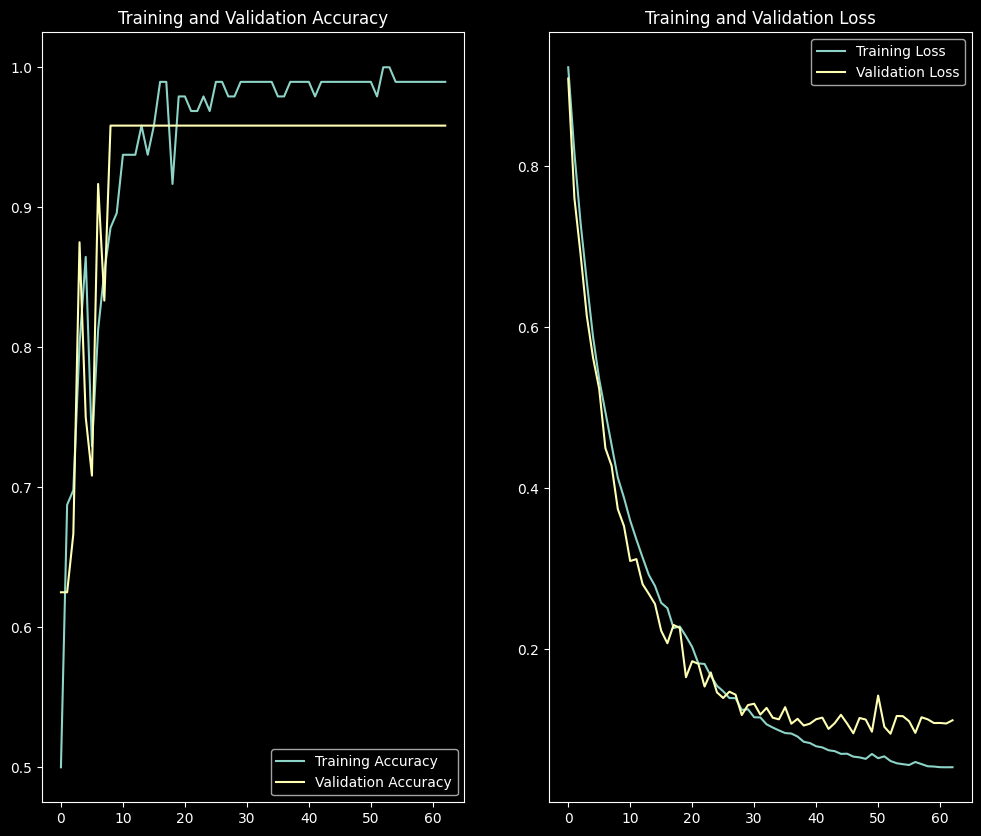

In [12]:
epochs_range = range(len(ann_train_loss))

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")
plt.show()

In [13]:
ann_test_loss, ann_test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1268 - sparse_categorical_accuracy: 0.9000
Test loss: 0.12681789696216583
Test accuracy: 0.8999999761581421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1268 - sparse_categorical_accuracy: 0.9000
Test loss: 0.12681789696216583
Test accuracy: 0.8999999761581421


In [14]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
